In [40]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [41]:

df = pd.read_csv('csv/new_combined_data_labeled.csv')
df.drop(['label','timestamp'],axis=1,inplace=True)

In [42]:
time = [i for i in range(df.shape[0])]
series = df.values

In [43]:
len(series)

347

In [44]:
SPLIT_TIME = 278
WINDOW_SIZE = 32
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 1000

In [45]:
time_train = time[:SPLIT_TIME]
series_train = series[:SPLIT_TIME]
time_valid = time[SPLIT_TIME:]
series_valid = series[SPLIT_TIME:]

In [46]:
def windowed_dataset(series, window_size):
    """Creates windowed dataset"""
    series = tf.expand_dims(series, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(SHUFFLE_BUFFER_SIZE)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(BATCH_SIZE).prefetch(1)
    return dataset

In [47]:
train_dataset = windowed_dataset(series_train, window_size=WINDOW_SIZE)

In [48]:
model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape=(None,series_train.shape[1])),
        tf.keras.layers.Conv1D(16,activation='relu',kernel_size=3),
        tf.keras.layers.LSTM(32,return_sequences=False),
        tf.keras.layers.Dense(1)
        ])

In [49]:
model.compile(loss='mse',
    optimizer='adam', 
    metrics=["mae"]) 

In [50]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))

In [51]:
history = model.fit(train_dataset, epochs=100)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 119916.0234 - mae: 156.1814
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 119964.7031 - mae: 156.2084
Epoch 3/100


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 119645.0703 - mae: 155.4668
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 119810.3047 - mae: 156.0047
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 119518.4141 - mae: 155.1837
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 119789.3906 - mae: 155.9216
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 119597.7812 - mae: 155.6214
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 119459.2422 - mae: 155.1063
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 119265.4609 - mae: 154.6192 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 119483.3359 - mae: 155.3504
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 119566.8047 - mae: 155.4861
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 119530.3125 - mae: 155.2897
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 119502.6328 - mae: 155.1916
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11

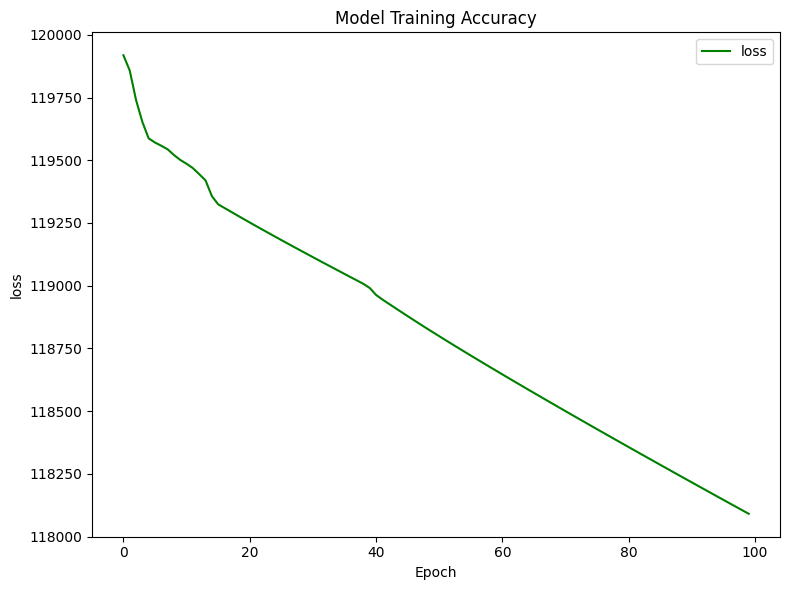

In [52]:
plt.figure(figsize=(8, 6))

# Subplot ketiga untuk training accuracy
plt.plot(history.history['loss'], label='loss', color='green')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.show()